In [17]:
import keras
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import numpy as np
import pandas as pd
import glob

In [18]:
def to_rgb1a(im):
    # Convert to RGB
    w, h = im.shape
    ret = np.empty((w, h, 3), dtype=np.float16)
    ret[:, :, 2] =  ret[:, :, 1] =  ret[:, :, 0] =  im
    return ret

In [19]:
def paths_to_tensor(arrs):
    list_of_tensors = [np.expand_dims(arr, axis = 0) for arr in arrs]
    return np.vstack(list_of_tensors)

Let's test it out!

In [22]:
main_model = keras.models.load_model('C:/Users/Alvin/.keras/models/face.weights.best.model5c2-27-1.19.hdf5')
main_model.load_weights('best_weights_model5c2.h5')

In [30]:
import operator
import cv2
import matplotlib.pyplot as plt  
import scipy
import urllib
from io import BytesIO
%matplotlib inline 

def predict_emotion(img_path):
#input a path or url to return dominant emotion and probabilities of each emotion
    
    #check for url and find face if url exists
    if img_path.find("http") != -1:
        req = urllib.request.Request(img_path, headers={'User-Agent': 'Mozilla/5.0'})
        #read image and store into variable
        file = BytesIO(urllib.request.urlopen(req).read())
        image = np.asarray(bytearray(file.read()), dtype="uint8")
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    
    else:
        
        #read image and store into variable given directory/path
        image = cv2.imread(img_path)
    
    #initialize cascadeclassifier
    cascpath = 'haarcascade_frontalface_default.xml'
    faceCascade = cv2.CascadeClassifier(cascpath)
    
    #show image
    plt.imshow(image)
    
    #convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30),
            flags = cv2.CASCADE_SCALE_IMAGE)
    
    #no face detected
    if len(faces) == 0:
        return "Unable to detect a face"
    
    #initialize coordinates for main face
    x_main = 0
    y_main = 0
    width = 0
    height = 0

    #set coordinates of face with highest width as the main face
    for (x, y, w, h) in faces:
        if w > width:
            x_main = x
            y_main = y
            width = w
            height = h
    
    #crop out face from image
    gray_face = gray[y_main:y_main+height, x_main:x_main+width]
    #resize face image to (48,48) like the images used to train the model
    gray_face = scipy.misc.imresize(gray_face, (48, 48))
    #preprocess image data
    processed_face = np.array([paths_to_tensor(to_rgb1a(gray_face))])
    #input into model for prediction
    prediction = main_model.predict(processed_face)
    
    result = [(j,i) for (i,j) in zip(prediction[0], ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])]
    print('Emotion: :',max(result, key = operator.itemgetter(1)))
    return result

Emotion: : ('Angry', 0.32592875)


[('Angry', 0.32592875),
 ('Disgust', 0.021091811),
 ('Fear', 0.12003645),
 ('Happy', 0.15209694),
 ('Sad', 0.16222577),
 ('Surprise', 0.049663257),
 ('Neutral', 0.16895705)]

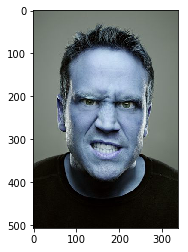

In [31]:
predict_emotion('https://s-media-cache-ak0.pinimg.com/736x/c1/71/c6/c171c6a95fdedcb1fcfbefbc3f8e31c1--face-expressions-face-reference.jpg')

Emotion: : ('Neutral', 0.22933941)


[('Angry', 0.16388823),
 ('Disgust', 0.013441442),
 ('Fear', 0.14059755),
 ('Happy', 0.16366863),
 ('Sad', 0.20113929),
 ('Surprise', 0.087925367),
 ('Neutral', 0.22933941)]

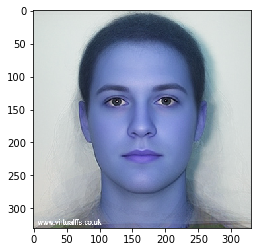

In [32]:
predict_emotion('test images/neutral face.jpg')

Emotion: : ('Surprise', 0.6515969)


[('Angry', 0.070217773),
 ('Disgust', 0.0036693139),
 ('Fear', 0.19765788),
 ('Happy', 0.048427176),
 ('Sad', 0.016993867),
 ('Surprise', 0.6515969),
 ('Neutral', 0.011437136)]

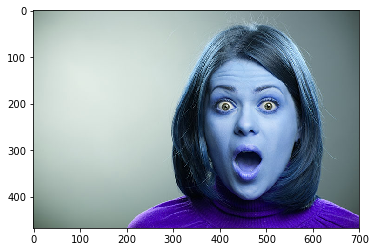

In [33]:
predict_emotion('http://cdn2.stylecraze.com/wp-content/uploads/2015/05/Surprised-Face-exercies.jpg')

Emotion: : ('Happy', 0.22465986)


[('Angry', 0.16154735),
 ('Disgust', 0.019272892),
 ('Fear', 0.15118815),
 ('Happy', 0.22465986),
 ('Sad', 0.19880185),
 ('Surprise', 0.09794157),
 ('Neutral', 0.14658831)]

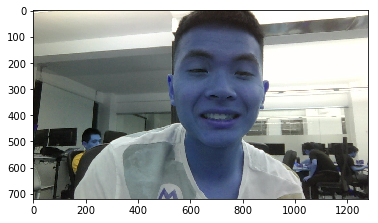

In [34]:
predict_emotion('test images/happy me.jpg')

Emotion: : ('Sad', 0.24409612)


[('Angry', 0.16391265),
 ('Disgust', 0.024053274),
 ('Fear', 0.12251535),
 ('Happy', 0.15080094),
 ('Sad', 0.24409612),
 ('Surprise', 0.081790447),
 ('Neutral', 0.21283117)]

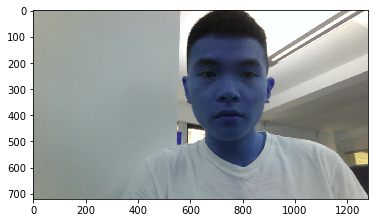

In [35]:
predict_emotion('test images/neutral or sad me.jpg')